<a href="https://colab.research.google.com/github/Turarr/Heart_Disease_Dataset_Analysis/blob/main/Heart_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Attack risk Dataset**

## **Dataset Description:**
This dataset models cardiovascular health records and is designed for machine learning models predicting cardiovascular risk. Each row represents a patient and includes health, lifestyle, and behavioral factors that influence cardiovascular health. The dataset reflects realistic medical relationships, where hypertension, high cholesterol, smoking, stress, and protection demonstrate the dynamics of cardiovascular risk.

**Dataset Link:** https://www.kaggle.com/datasets/vishardmehta/heart-risk-progression-dataset

**Attributes Description:**

| Attribute                            | Type                 | Description                                                                               |
| ------------------------------------ | -------------------- | ----------------------------------------------------------------------------------------- |
| **Patient_ID**                       | Integer / String     | Unique identifier assigned to each patient; used only for record identification.          |
| **age**                              | Integer              | Age of the patient in years; higher age is associated with increased cardiovascular risk. |
| **bmi**                              | Float                | Body Mass Index; indicator of body fat based on height and weight.                        |
| **systolic_bp**                      | Integer              | Systolic blood pressure (mmHg); pressure during heart contraction.                        |
| **diastolic_bp**                     | Integer              | Diastolic blood pressure (mmHg); pressure between heartbeats.                             |
| **cholesterol_mg_dl**                | Integer              | Total cholesterol level in mg/dL; elevated levels increase heart disease risk.            |
| **resting_heart_rate**               | Integer              | Resting heart rate in beats per minute.                                                   |
| **smoking_status**                   | Categorical (String) | Smoking behavior category: *Never*, *Former*, or *Current*.                               |
| **daily_steps**                      | Integer              | Average number of steps taken per day; reflects daily activity level.                     |
| **stress_level**                     | Integer (1–10)       | Self-reported stress level on a scale from 1 (low) to 10 (high).                          |
| **physical_activity_hours_per_week** | Float                | Total weekly hours of structured physical exercise.                                       |
| **sleep_hours**                      | Float                | Average number of hours slept per night.                                                  |
| **family_history_heart_disease**     | Binary/Categorical              | Indicates presence (`True`) or absence (`False`) of family history of heart disease.      |
| **diet_quality_score**               | Integer (1–10)       | Score representing overall diet quality; higher values indicate healthier diet.           |
| **alcohol_units_per_week**           | Float                | Average number of alcohol units consumed per week.                                        |
| **heart_disease_risk_score(target)**         | Float (0–100)        | Calculated cardiovascular risk score summarizing multiple risk factors.                   |
| **risk_category**                    | Categorical (String) | Risk classification label: *Low*, *Medium*, or *High*.                                    |


##**libraries**

In [ ]:
######
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances


# **1. Data Understanding & Integrity**

In [ ]:
path = kagglehub.dataset_download("vishardmehta/heart-risk-progression-dataset")
file_path = os.path.join(path, 'cardiovascular_risk_dataset.csv')
df = pd.read_csv(file_path)

100%|██████████| 129k/129k [00:00<00:00, 24.1MB/s]

Extracting files...


In [ ]:
df.head()

,Patient_ID,age,bmi,systolic_bp,diastolic_bp,cholesterol_mg_dl,resting_heart_rate,smoking_status,daily_steps,stress_level,physical_activity_hours_per_week,sleep_hours,family_history_heart_disease,diet_quality_score,alcohol_units_per_week,heart_disease_risk_score,risk_category
0,1,62,25.0,142,93,247,72,Never,11565,3,5.6,8.2,No,7,0.7,28.1,Medium
1,2,54,29.7,158,101,254,74,Current,4036,8,0.5,6.7,No,5,4.5,63.0,High
2,3,46,36.2,170,113,276,80,Current,3043,9,0.4,4.0,No,1,20.8,73.1,High
3,4,48,30.4,153,98,230,73,Former,5604,5,0.6,8.0,No,4,8.5,39.5,Medium
4,5,46,25.3,139,87,206,69,Current,7464,1,2.0,6.1,No,5,3.6,29.3,Medium


In [ ]:
df.shape

(5500, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        5500 non-null   int64  
 1   age                               5500 non-null   int64  
 2   bmi                               5500 non-null   float64
 3   systolic_bp                       5500 non-null   int64  
 4   diastolic_bp                      5500 non-null   int64  
 5   cholesterol_mg_dl                 5500 non-null   int64  
 6   resting_heart_rate                5500 non-null   int64  
 7   smoking_status                    5500 non-null   object 
 8   daily_steps                       5500 non-null   int64  
 9   stress_level                      5500 non-null   int64  
 10  physical_activity_hours_per_week  5500 non-null   float64
 11  sleep_hours                       5500 non-null   float64
 12  family

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
age,0
bmi,0
systolic_bp,0
diastolic_bp,0
cholesterol_mg_dl,0
resting_heart_rate,0
smoking_status,0
daily_steps,0
stress_level,0


## **Details**
This dataset is perfect. There is no missing values, duplicates and imposible values. 5500 rows and 17 columns in dataset.

# **2. Descriptive Statistics & Distributions**

In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['Patient_ID', 'age', 'bmi', 'systolic_bp', 'diastolic_bp',
       'cholesterol_mg_dl', 'resting_heart_rate', 'daily_steps',
       'stress_level', 'physical_activity_hours_per_week', 'sleep_hours',
       'diet_quality_score', 'alcohol_units_per_week',
       'heart_disease_risk_score'],
      dtype='object')

In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,5500.0,2750.500000,1587.857571,1.0,1375.75,2750.5,4125.25,5500.0
age,5500.0,53.872000,21.196017,18.0,36.00,54.0,72.00,90.0
bmi,5500.0,28.170818,4.189877,15.0,25.20,28.4,31.10,40.9
systolic_bp,5500.0,147.248182,13.222701,108.0,138.00,147.0,156.00,192.0
diastolic_bp,5500.0,95.756727,9.451559,64.0,89.00,96.0,102.00,120.0
cholesterol_mg_dl,5500.0,239.684182,28.570177,147.0,220.00,240.0,260.00,331.0
resting_heart_rate,5500.0,74.075091,6.392166,48.0,70.00,74.0,79.00,92.0
daily_steps,5500.0,5902.929455,3041.084590,500.0,3428.00,5460.0,7772.00,16793.0
stress_level,5500.0,4.907091,2.298173,1.0,3.00,5.0,7.00,10.0
physical_activity_hours_per_week,5500.0,3.299364,2.672457,0.0,1.20,2.6,4.90,12.9


### Descriptive Statistics of numerical columns

In [ ]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['smoking_status', 'family_history_heart_disease', 'risk_category'], dtype='object')

In [ ]:
for col in cat_cols:
    print(f"\n{col}")
    print(df[col].value_counts())


smoking_status
smoking_status
Never      3627
Current     994
Former      879
Name: count, dtype: int64

family_history_heart_disease
family_history_heart_disease
No     4134
Yes    1366
Name: count, dtype: int64

risk_category
risk_category
Medium    2244
Low       1838
High      1418
Name: count, dtype: int64


### Descriptive Statistics of categorial columns

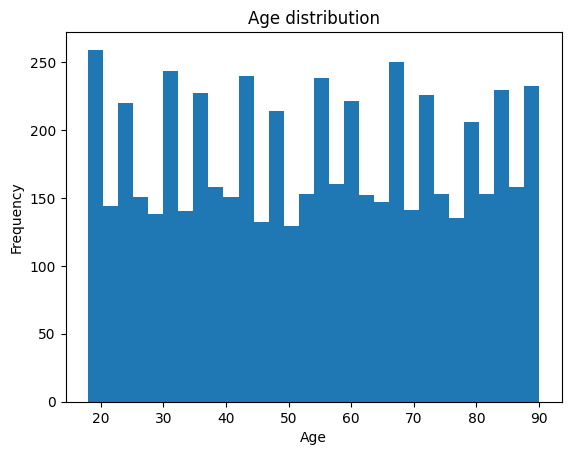

In [ ]:
plt.hist(df["age"], bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()

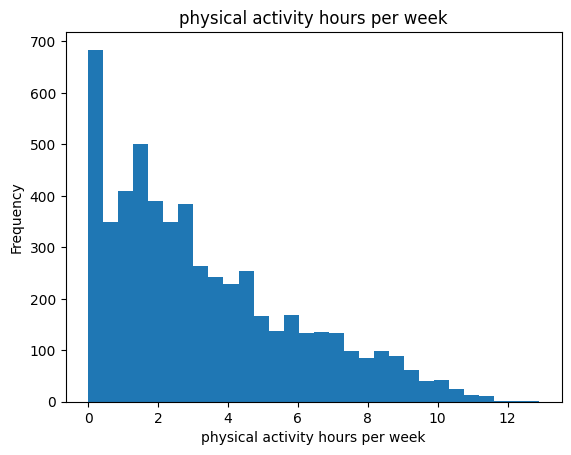

In [ ]:
plt.hist(df["physical_activity_hours_per_week"], bins=30)
plt.xlabel("physical activity hours per week")
plt.ylabel("Frequency")
plt.title("physical activity hours per week")
plt.show()

### Does not fit in normal distribution at all

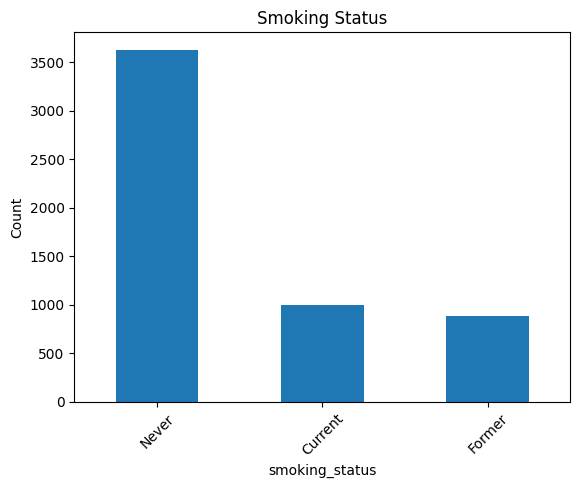

In [ ]:
df["smoking_status"].value_counts().plot(kind="bar")
plt.title("Smoking Status")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

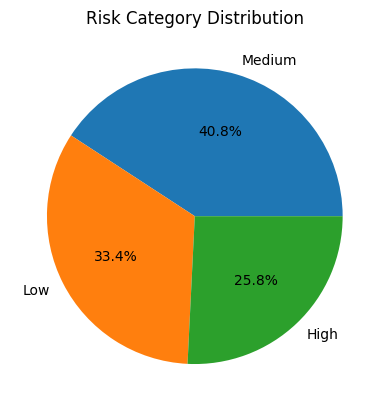

In [ ]:
df["risk_category"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Risk Category Distribution")
plt.ylabel("")
plt.xticks(rotation = 45)
plt.show()

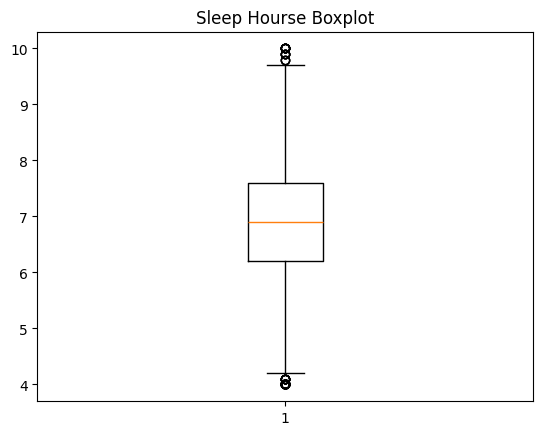

In [ ]:
plt.boxplot(df["sleep_hours"])
plt.title("Sleep Hourse Boxplot")
plt.show()

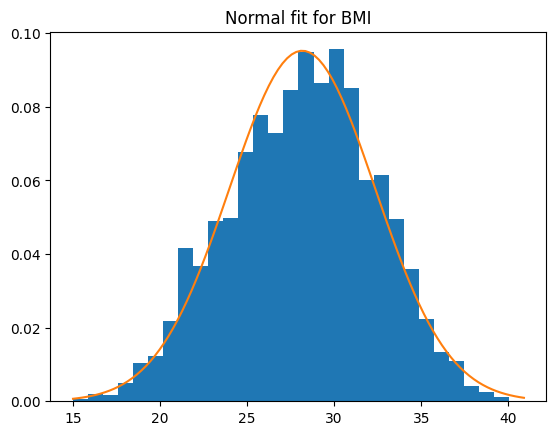

In [ ]:
mu, sigma = df['bmi'].mean(), df['bmi'].std()
x = np.linspace(df["bmi"].min(), df["bmi"].max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)

plt.hist(df["bmi"], bins=30, density=True)
plt.plot(x, pdf)
plt.title("Normal fit for BMI")
plt.show()

### This plot approximately follows a normal distribution.

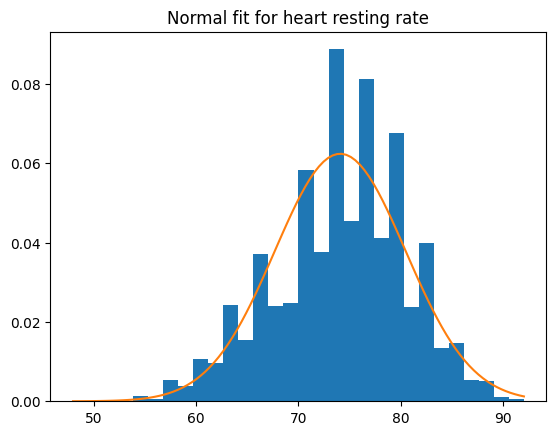

In [ ]:
mu, sigma = df['resting_heart_rate'].mean(), df['resting_heart_rate'].std()
x = np.linspace(df["resting_heart_rate"].min(), df["resting_heart_rate"].max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)

plt.hist(df["resting_heart_rate"], bins=30, density=True)
plt.plot(x, pdf)
plt.title("Normal fit for heart resting rate")
plt.show()

### This plot almost follows a normal distribution.

# **3. Parameter Estimation & Confidence Intervals**

In [ ]:
sample_mean_age = df['age'].mean()
print(f"Point estimate of the population mean age: {sample_mean_age:.2f} years")

sample_size = len(df['age'])
sample_std_age = df['age'].std()
standard_error_age = sample_std_age / np.sqrt(sample_size)
degrees_freedom = sample_size - 1

confidence_levels = [0.95, 0.99, 0.90]

for cl in confidence_levels:
    margin_of_error = stats.t.ppf((1 + cl) / 2, degrees_freedom) * standard_error_age

    confidence_interval_lower = sample_mean_age - margin_of_error
    confidence_interval_upper = sample_mean_age + margin_of_error

    print(f"\n{cl*100:.0f}% Confidence Interval for Population Mean Age: ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f}) years")

Point estimate of the population mean age: 53.87 years

95% Confidence Interval for Population Mean Age: (53.31, 54.43) years

99% Confidence Interval for Population Mean Age: (53.14, 54.61) years

90% Confidence Interval for Population Mean Age: (53.40, 54.34) years


### **Results**
A higher confidence level (e.g., 99%) would result in a wider confidence interval, as we need to be more certain to capture the true population parameter.
Conversely, a lower confidence level (e.g., 90%) would result in a narrower interval but with less certainty.

A larger sample size generally leads to a smaller standard error and thus a narrower confidence interval (assuming the same confidence level). This is because a larger sample provides more information about the population, leading to a more precise estimate.

# **4. Hypothesis Testing & Statistical Errors**

Independent Samples t-test, Welch's t-test

Hypothesis Test: Comparing Heart Disease Risk Score based on Family History

Define Hypotheses

H(0) (Null Hypothesis): There is no significant difference in the mean heart_disease_risk_score between patients with and without a family history of heart disease.
                    
                    μ_family_history_yes = μ_family_history_no

H(1) (Alternative Hypothesis): There is a significant difference in the mean heart_disease_risk_score between patients with and without a family history of heart disease.
                    
                    μ_family_history_yes ≠ μ_family_history_no

In [ ]:
significance_level = 0.05
print(f"Significance Level (α): {significance_level}")

group_family_history_yes = df[df['family_history_heart_disease'] == 'Yes']['heart_disease_risk_score']
group_family_history_no = df[df['family_history_heart_disease'] == 'No']['heart_disease_risk_score']

t_statistic, p_value = stats.ttest_ind(group_family_history_yes, group_family_history_no, equal_var=False)

print(f"\nTest Statistic (t): {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < significance_level:
    conclusion = "Reject the null hypothesis."
else:
    conclusion = "Fail to reject the null hypothesis."

print(f"\nConclusion: {conclusion}")

print("\nDiscussion of Effect Size:")

mean_yes = group_family_history_yes.mean()
mean_no = group_family_history_no.mean()
std_pooled = np.sqrt(((len(group_family_history_yes) - 1) * group_family_history_yes.std()**2 + \
                      (len(group_family_history_no) - 1) * group_family_history_no.std()**2) / \
                     (len(group_family_history_yes) + len(group_family_history_no) - 2))

cohens_d = (mean_yes - mean_no) / std_pooled

print(f"Mean heart disease risk score for patients with family history: {mean_yes:.2f}")
print(f"Mean heart disease risk score for patients without family history: {mean_no:.2f}")
print(f"Cohen's d (Effect Size): {cohens_d:.3f}")


Significance Level (α): 0.05

Test Statistic (t): 11.8734
P-value: 0.0000

Conclusion: Reject the null hypothesis.

Discussion of Effect Size:
Mean heart disease risk score for patients with family history: 44.31
Mean heart disease risk score for patients without family history: 35.30
Cohen's d (Effect Size): 0.376


**Conclusion:** Reject the null hypothesis.

**Interpretation:** There is a clear link between family history and heart disease risk. Because your P-value is basically zero, we can confidently say the difference between the two groups isn't just a lucky guess—it’s statistically real.

**Discussion of Effect Size:**

**Mean heart disease risk score for patients with family history:** 44.31

**Mean heart disease risk score for patients without family history:** 35.30

**Difference:** 9 points

**Cohen's d (Effect Size):** 0.376

The difference is definitely there, but it is considered small. Family history matters, but it isn't the only thing driving the risk score.

**Errors**

**False Positive (Type I):** Claiming family history matters when it actually doesn’t. You’ve set the risk of this happening at 5%.

**False Negative (Type II):** Missing the connection entirely and saying there’s no difference when there actually is.

**Discussion of Statistical Power:**
Statistical power is the probability of correctly rejecting the null hypothesis when it is false (i.e., detecting an effect if there really is one). A higher power reduces the chance of a Type II error. Factors influencing power include sample size, effect size, and significance level. With a larger sample size and a larger effect size, the power of the test generally increases.

# **5. Regression or Generalized Linear Model**

The variables bmi, age, systolic blood pressure, family history of heart disease used as predictors. These are justified because medical science shows they directly impact heart health.

In [ ]:
family_history_mapping = {'Yes': 1, 'No': 0}
df['family_history_int'] = df['family_history_heart_disease'].map(family_history_mapping)

X = df[['age', 'bmi', 'systolic_bp', 'family_history_int', 'cholesterol_mg_dl', 'physical_activity_hours_per_week', 'diet_quality_score', 'stress_level', 'alcohol_units_per_week']]
y = df['heart_disease_risk_score']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     heart_disease_risk_score   R-squared:                       0.929
Model:                                  OLS   Adj. R-squared:                  0.929
Method:                       Least Squares   F-statistic:                     7994.
Date:                      Wed, 11 Feb 2026   Prob (F-statistic):               0.00
Time:                              17:04:43   Log-Likelihood:                -18070.
No. Observations:                      5500   AIC:                         3.616e+04
Df Residuals:                          5490   BIC:                         3.623e+04
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

### **Interpretation**

**R-squared is 0.929.** This means your model explains 92.9% of the variation in heart disease risk scores. In the world of medical data, this is an exceptionally high score, suggesting that age, BMI, blood pressure, and family history are the "heavy hitters" that determine most of a person's risk.

**Prob (F-statistic) (0.00):** This $p$-value is effectively zero, meaning the model as a whole is highly statistically significant.

### **Coefficients**
**family_history_int ($+9.5351$):** This is the strongest predictor. If a patient has a family history of heart disease, their risk score is predicted to be 9.54 points higher than someone without it.

**systolic_bp ($+0.8046$):** For every $1 \text{ mmHg}$ increase in systolic blood pressure, the risk score increases by $0.80$ points. This makes BP the most significant continuous clinical variable.

**stress_level ($+0.4755$):** For every 1-point increase on the stress scale, the risk score rises by $0.48$ points.

**bmi ($+0.3915$):** For every 1-unit increase in BMI, the risk score goes up by $0.39$ points.

**age ($+0.3075$):** Each year of age adds $0.31$ points to the risk score.

**cholesterol_mg_dl ($+0.1230$):** For every $1 \text{ mg/dL}$ increase in cholesterol, the risk score increases by $0.12$ points. (A 100-point increase would add 12 points to the risk).

**physical_activity_hours_per_week ($-1.3090$):** This is the strongest protective factor. For every additional hour of exercise per week, the risk score decreases by $1.31$ points.

**diet_quality_score ($-1.1209$):** For every 1-point improvement in diet quality, the risk score decreases by $1.12$ points.

**alcohol_units_per_week ($+0.0352$):** While the coefficient is positive, the $P$-value is $0.216$ (higher than $0.05$). This means we cannot say with statistical confidence that alcohol affects the risk score in this model. It is effectively "noise."

Mean Absolute Error (MAE): 6.08
Mean Squared Error (MSE): 56.96


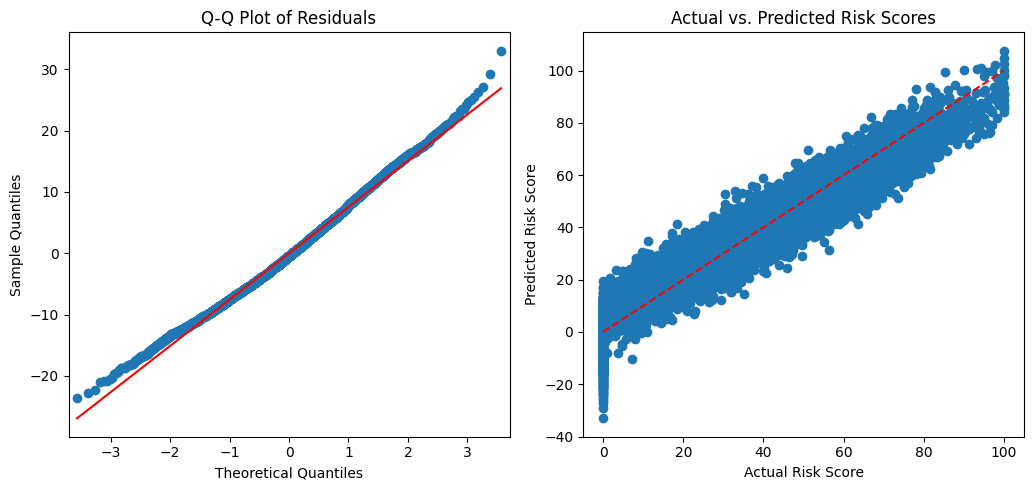

In [ ]:
# 1. Generate predictions
predictions = model.predict(X)

# 2. Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# 3. Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# 4. Residual Plots
residuals = y - predictions

plt.figure(figsize=(15, 5))

# Q-Q plot for residuals to check normality
plt.subplot(1, 3, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals")

# Plot actual vs. predicted values
plt.subplot(1, 3, 3)
plt.scatter(y, predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Risk Score")
plt.ylabel("Predicted Risk Score")
plt.title("Actual vs. Predicted Risk Scores")

plt.tight_layout()
plt.show()

### **Metrics**
**MAE (6.08):** On average, your model's predictions are off by about 6 points. Given that your risk scores go up to 100, a 6% average error is quite low.

**MSE (56.96):** This penalizes larger errors more heavily. Since this number isn't massive compared to the MAE, it suggests you don't have too many "extreme" outliers where the model was catastrophically wrong.

## **6. Categorical Data Analysis**

Analyze the relationship between 'smoking_status' and 'risk_category' by creating a contingency table, performing a Chi-square test of independence, calculating Cramér’s V, and interpreting the practical implications of these statistical measures.

### **Create Contingency Table**


In [ ]:
contingency_table = pd.crosstab(df['smoking_status'], df['risk_category'])
print(contingency_table)

risk_category   High   Low  Medium
smoking_status                    
Current          562    59     373
Former           253   218     408
Never            603  1561    1463


### **Perform Chi-square Test of Independence**

### Hypotheses:

**Null Hypothesis (H0):** smoking_status and risk_category are independent. There is no association between a person's smoking status and their heart disease risk category.

**Alternative Hypothesis (H1):** smoking_status and risk_category are not independent. There is a significant association between a person's smoking status and their heart disease risk category.

In [ ]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Degrees of Freedom: {dof}")

Chi-square Statistic: 839.98
P-value: 0.000
Degrees of Freedom: 4


The p-value is far below the 0.05 threshold.

Reject the null hypothesis.

There is a statistically significant association between smoking status and heart disease risk category.

In [ ]:
n = contingency_table.sum().sum()
k = min(contingency_table.shape)
cramer_v = np.sqrt(chi2 / (n * (k - 1)))

print(f"Cramér's V: {cramer_v:.3f}")

Cramér's V: 0.276


0.276 ≈ small-to-moderate effect

Smoking status explains a meaningful but not overwhelming portion of variability in risk category.

Even though smoking alone does not determine risk, it is a significant behavioral factor influencing cardiovascular risk classification.

# **7. Comparing Means**

**H(0):** The mean age is the same across all heart disease risk categories.

**H(1):** At least one risk category has a mean age that is different from the others.

In [ ]:
age_low = df[df['risk_category'] == 'Low']['age']
age_medium = df[df['risk_category'] == 'Medium']['age']
age_high = df[df['risk_category'] == 'High']['age']

In [ ]:
mean_low = age_low.mean()
mean_medium = age_medium.mean()
mean_high = age_high.mean()

print(mean_low)
print(mean_medium)
print(mean_high)

37.03754080522307
55.52762923351159
73.07263751763047


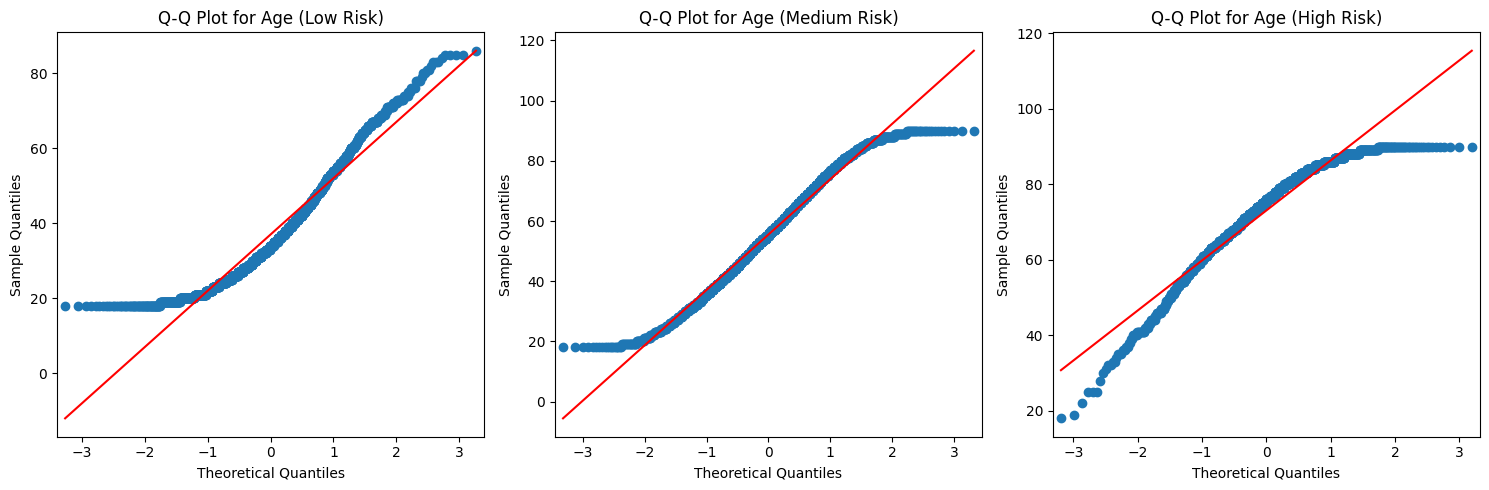

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sm.qqplot(age_low, line='s', ax=plt.gca())
plt.title('Q-Q Plot for Age (Low Risk)')

plt.subplot(1, 3, 2)
sm.qqplot(age_medium, line='s', ax=plt.gca())
plt.title('Q-Q Plot for Age (Medium Risk)')

plt.subplot(1, 3, 3)
sm.qqplot(age_high, line='s', ax=plt.gca())
plt.title('Q-Q Plot for Age (High Risk)')

plt.tight_layout()
plt.show()

### **One-way ANOVA results**

In [ ]:
f_statistic, p_value_anova = stats.f_oneway(age_low, age_medium, age_high)

print(f"ANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value_anova:.3e}")


ANOVA F-statistic: 2030.91
ANOVA P-value: 0.000e+00


### **Effect size**

In [ ]:
k = 3  # Number of groups (Low, Medium, High)
N = len(df) # Total number of observations

df_between = k - 1
df_within = N - k

eta_squared = (f_statistic * df_between) / (f_statistic * df_between + df_within)

print(f"Eta-squared (η²): {eta_squared:.3f}")

Eta-squared (η²): 0.425


### **Post-hoc analysis (Tukey HSD)**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  High    Low -36.0351   0.0 -37.3672  -34.703   True
  High Medium  -17.545   0.0 -18.8236 -16.2664   True
   Low Medium  18.4901   0.0  17.3044  19.6758   True
-----------------------------------------------------


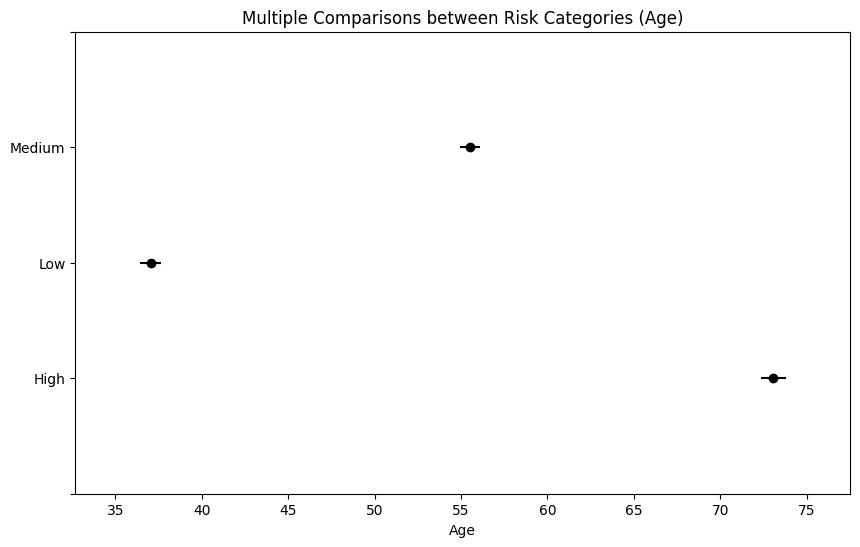

In [ ]:
tukey = pairwise_tukeyhsd(endog=df['age'],     # Data
                          groups=df['risk_category'],   # Groups
                          alpha=0.05)          # Significance level

# 2. Display the results table
print(tukey)

# 3. Optional: Visualize the confidence intervals
tukey.plot_simultaneous()
plt.title("Multiple Comparisons between Risk Categories (Age)")
plt.xlabel("Age")
plt.show()

## **Interpretation**
A one-way ANOVA revealed a statistically significant effect of risk category on age, with large effect size. Post-hoc Tukey tests indicated that all three risk groups differed significantly from each other, showing a clear monotonic increase in age from low- to high-risk categories. These findings confirm age as a major contributor to cardiovascular risk stratification.